<a href="https://colab.research.google.com/github/Namrata-art/Analysis/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Yulu:**

*Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute.*

**Business Problem:**

*The company wants to know:*

*• Which variables are significant in predicting the demand for shared electric cycles in the Indian market?*

*• How well those variables describe the electric cycle demands*

*The dataset includes features like:*

||Features|
|-|-|
|1|Datetime|
|2|Season|
|3|Holiday|
|4|Work day|
|5|Weather|
|6|Temp|
|7|Atemp|
|8|Humidity|
|9|Windspeed|
|10|Casual|
|11|Registered|
|12|Count|


---
**Feature Profiling:**

**datetime:** *datetime*

**season:** *season (1: spring, 2: summer, 3: fall, 4: winter)*

**holiday:** *whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)*

**workingday:** *if day is neither weekend nor holiday is 1, otherwise is 0.*

**weather:**

*1:* *Clear, Few clouds, partly cloudy, partly cloudy*

*2:* *Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist*

*3:* *Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds*

*4:* *Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*

**temp:** temperature in Celsius

**atemp:** *feeling temperature in Celsius*

**humidity:** *humidity*

**windspeed:** *wind speed*

**casual:** *count of casual users*

**registered:** *count of registered users*

**count:** *count of total rental bikes including both casual and registered*

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 


df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Total number of records are :** `10886`

**Unique datatypes available in the dataset are:**

`Object, int and float types, but majority being int type.`

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Missing values:**

`There appears to be no missing values in any of the features provided in the dataset.`

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Temperature variations observed:**

  *  *Max. Temperature recorded:* `41 *C`

  *  *Min. Temperature recorded:* `0.82 *C`

  *  *Median Temperature recorded in all the places is:* `20.5 *C`

**Variations in humidity levels:**

  *  *Max. humidity level recorded:* `100 %`

  *  *Min. humidity level recorded:* `0 %`

  *  *Median humidity level recorded in all the places is:* `62 %`

**Observing variability of windspeed:**

  *  *Max. windspeed recorded:* `56.99 km/h`

  *  *Min. windspeed recorded:* `0.00 km/h`

  *  *Median windspeed recorded in all the places is:* `12.99 km/h`


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['Weekday'] = df['datetime'].dt.weekday

In [ ]:
bins = [-1.00,20.00,30.00,40.00,50.00,60.00]
groups = ["Light winds", "Moderate winds", "Fresh winds", "Strong winds", "Near gale"]
df['wind_category'] = pd.cut(df['windspeed'],bins,labels=groups)

In [ ]:
bins1 = [-1,0,1,2,3,4,5,6]
groups1 = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
df['Weekday'] = pd.cut(df['Weekday'],bins1,labels=groups1)
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,Weekday,wind_category
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,Sat,Light winds


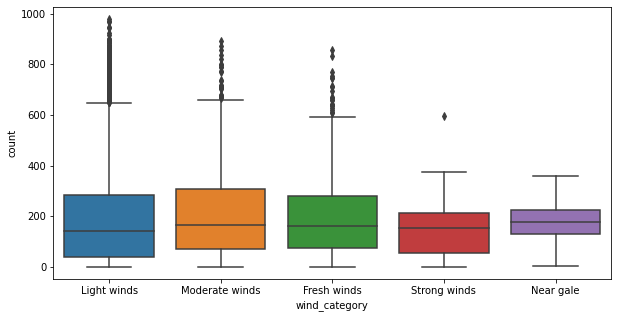

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['wind_category'],df['count'])
plt.show()

**Median number of bikes being used across all wind categories appears to be less than 200 and almost equal.**

In [ ]:
df.groupby('wind_category')['count'].count().sort_values(ascending=False)

wind_category
Light winds       9391
Moderate winds    1068
Fresh winds        387
Strong winds        36
Near gale            4
Name: count, dtype: int64

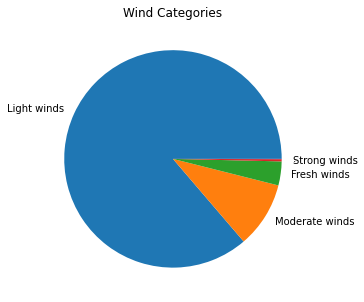

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Wind Categories")
plt.pie(df.groupby('wind_category')['count'].count(),labels = ["Light winds", "Moderate winds", "Fresh winds", "Strong winds",'.'])
plt.show()

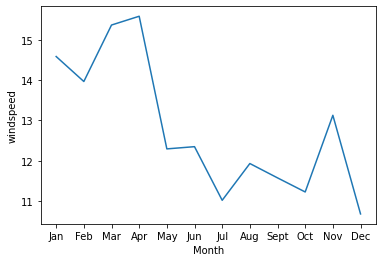

In [ ]:
avg_wind = df.groupby('Month')['windspeed'].sum()/df.groupby('Month')['windspeed'].count()
sns.lineplot(avg_wind.index,avg_wind)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

**Average wind speed is found to be high in the months of Jan,Feb,Mar,Apr and less in other months.**

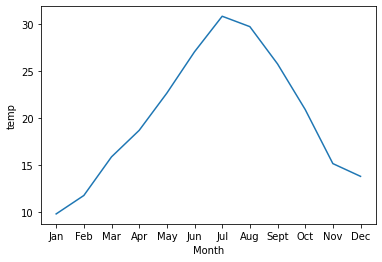

In [ ]:
avg_temp = df.groupby('Month')['temp'].sum()/df.groupby('Month')['temp'].count()
sns.lineplot(avg_temp.index,avg_temp)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

**Average temp is found to be high in the months of Jun,Jul,Aug**

In [ ]:
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
iqr=q3-q1
df=df[(df['count']>(q1-1.5*iqr) ) & (df['count']<(q3+1.5*iqr))]


# **Statistical Analysis:**



# 1. `Check if Working Day has an effect on the number of electric cycles rented` 



---


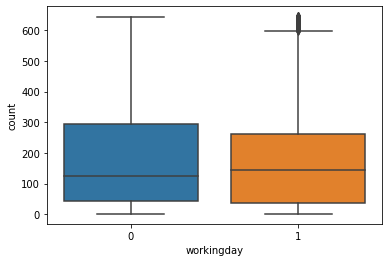

In [ ]:
sns.boxplot(x='workingday', y='count', data=df)
plt.show()

**There appears be marginal difference of count of bikes used on weekdays versus weekends.**
To study the significance of this observation we can perform statistical tests as follows.

### **Step 1: Hypothesis formulation: The null and alternate hypothesis**


$H_0:$ The mean count on weekday **is equal** to the mean count on weekend.

$H_a:$ The mean count on weekday **is greater than** mean count on weekend.

Let $\mu_1$ and $\mu_2$ be the mean number of bikes used on weekdays and weekends respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

Let the significance value α = 0.05

### **Step 2: Selecting the appropriate test**

*This is a **one-tailed test** as the alternative hypothesis is only about checking if one of the means is greater than the other.* 

*As the population standard deviations are unknown, the **two sample** independent **t-test** will be the appropriate test for this problem.*


### **Step 3: Preparing the data**

In [ ]:
df['workingday'].value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

In [ ]:
df.groupby('workingday')['count'].count()

workingday
0    3422
1    7161
Name: count, dtype: int64

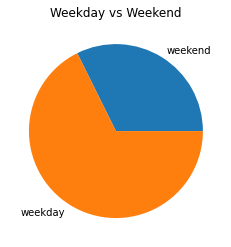

In [ ]:
plt.title("Weekday vs Weekend")
plt.pie(df.groupby('workingday')['count'].count(),labels=['weekend','weekday'])
plt.show()



---


**Here from the pie chart we observe that:** 

`more bikes are being used on weekdays than weekends.`


---



In [ ]:
weekday = df[df['workingday'] == 1]['count'].sample(3422)
weekend = df[df['workingday'] == 0]['count'].sample(3422)

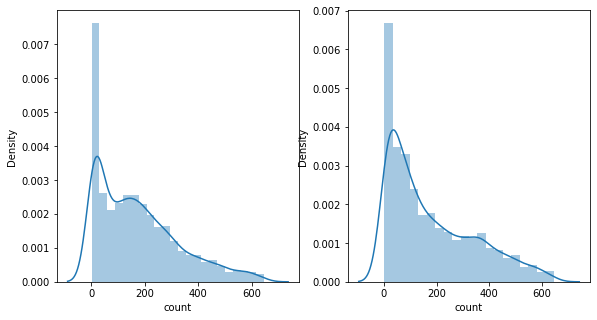

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(weekday,kde=True)
plt.subplot(1,4,2)
sns.distplot(weekend,kde=True)
plt.show()



---


**From the above histograms for counts of bikes used on weekdays and weekends , we can say that the data is not normally distributed and so we can use tranformations to try to make it normal.**


---



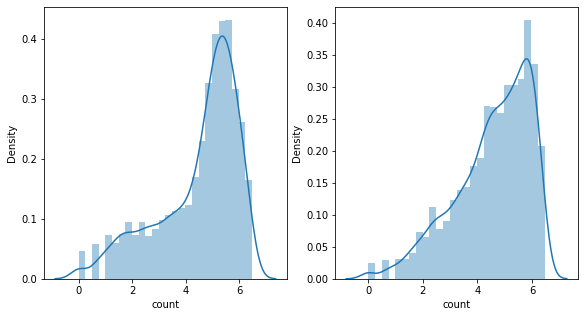

In [ ]:
log_weekday = np.log(weekday)
log_weekend = np.log(weekend)
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(log_weekday,kde=True)
plt.subplot(1,4,2)
sns.distplot(log_weekend,kde=True)
plt.show()



---


**By transforming the data using the log transform we get in some measure, a normal data distribution.**


---



In [ ]:
print('The sample standard deviation of the count on weekday is:', round(log_weekday.std(),2))
print('The sample standard deviation of the count on weekend is:', round(log_weekend.std(),2))


The sample standard deviation of the count on weekday is: 1.5
The sample standard deviation of the count on weekend is: 1.37


As the sample standard deviations are different, the population standard deviations may be
assumed to be different.

### **Step 4: Checking the test assumptions**

*The t-test assumptions are as follows:*

*  **Normality :**`We can use Shapiro-Wilk’s test to test for normality.` 

*  **Equal Variance :** `We can use Levene’s test to test for same variance.`



**Shapiro-Wilk’s test**

We will test the null hypothesis

$H_0:$ Count follows normal distribution
against the alternative hypothesis

$H_a:$ Count doesn't follow normal distribution

Let the significance value α = 0.05

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro
# find the p-value
w1, p_value1 = shapiro(log_weekday) 
print('The p-value1 is', p_value1)
w2, p_value2 = shapiro(log_weekend) 
print('The p-value2 is', p_value2)


The p-value1 is 4.764414778704378e-44
The p-value2 is 3.414232991865079e-37


As **p_values** for both the distributions are **less than α** , we reject null hypothesis and thus we can say that the **weekday** and **weekend** distributions **do not follow normality**.

**Levene’s test**

We will test the null hypothesis

$H_0:$ All the count variances are equal
against the alternative hypothesis

$H_a:$ At least one variance is different from the rest

Let the significance value α = 0.05

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( log_weekday, log_weekend)
# find the p-value
print('The p-value is', p_value)


The p-value is 0.06461031178398341


As **p_value** is **greater than α** , we fail to reject null hypothesis and thus we can say that both **log transform of weekdays** and **log transform of weekends** have **same variances**.

### **Step 5: Calculate the p-value**


In [ ]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(log_weekday, log_weekend, equal_var = True, alternative = 'greater')
print('The p-value is', p_value)


The p-value is 0.992913883542247


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

As the p-value 0.992913883542247 is greater than the level of significance, we fail to reject the null hypothesis


## **Conclusion:**



---



```
From the above statistical analysis we proved that, the count of bikes used on a weekday and weekend are same.
```


---






---


# 2. `Check if No. of cycles rented is similar or different in different weather` 


---



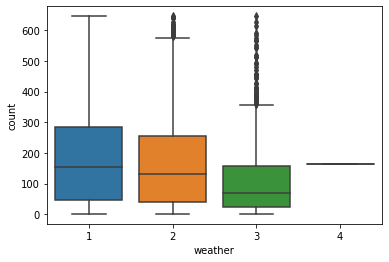

In [ ]:
sns.boxplot(x='weather', y='count', data=df)
plt.show()



---


**We observe from the graph that the median number of bikes used from weather 1 to weather 3 keeps gradually reducing.**


---

### **Step 1: Defining the null and alternate hypotheses**

$H_0:$ The mean count in different weather are **equal**.

$H_a:$ The mean count in different weather are **different**.

Let the significance value α = 0.05

### **Step 2: Selecting Appropriate test**

This is a problem, concerning **three population means**.**One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

*  For **testing of normality**, **Shapiro-Wilk’s test** is applied to the response variable.

*  For **equality of variance**, **Levene test** is applied to the response variable.



### **Step 3: Preparing the data**



In [ ]:
df.weather.value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

*weather 4 has just one value, hence we can drop it.*

In [ ]:
df=df[~(df['weather']==4)]
w1 = df[df['weather'] == 1]['count'].sample(850)
w2= df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)


In [ ]:
df.groupby('weather')['count'].count()

weather
1    6962
2    2770
3     850
Name: count, dtype: int64

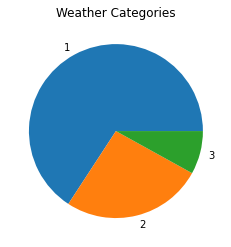

In [ ]:
plt.title("Weather Categories")
plt.pie(df.groupby('weather')['count'].count(),labels=['1','2','3'])
plt.show()

In [ ]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


*Highest average number of bikes appear to be used under weather 1 conditions.*

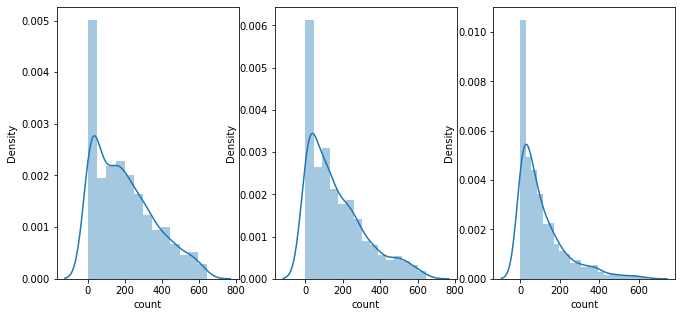

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.distplot(w1,kde=True)
plt.subplot(1,4,2)
sns.distplot(w2,kde=True)
plt.subplot(1,4,3)
sns.distplot(w3,kde=True)
plt.show()

Above are the distribution plots for the counts of bikes on different weather conditions.

The plot clearly shows that the data is not normally distributed, we will apply transformations on the data to try to bring it close to normality.

In [ ]:
print('The sample standard deviation of weather 1 is:', round(w1.std(),4))
print('The sample standard deviation of weather 2 is:', round(w2.std(),4))
print('The sample standard deviation of weather 3 is:', round(w3.std(),4))

The sample standard deviation of weather 1 is: 162.5004
The sample standard deviation of weather 2 is: 152.4882
The sample standard deviation of weather 3 is: 121.2334


*There appears to be **siginificant difference** in **variances** between the distributions.*

**After applying Log Transforms on the data**

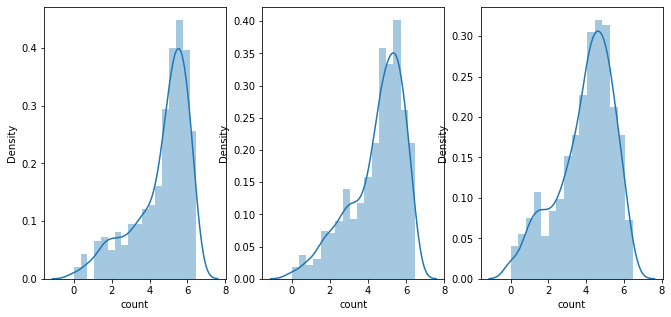

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.distplot(np.log(w1),kde=True)
plt.subplot(1,4,2)
sns.distplot(np.log(w2),kde=True)
plt.subplot(1,4,3)
sns.distplot(np.log(w3),kde=True)
plt.show()

We can notice that the data in some measure appears to be normally distribution.

In [ ]:
print('The sample standard deviation of log of weather 1 is:', round(np.log(w1).std(),4))
print('The sample standard deviation of log of weather 2 is:', round(np.log(w2).std(),4))
print('The sample standard deviation of log of weather 3 is:', round(np.log(w3).std(),4))

The sample standard deviation of log of weather 1 is: 1.4504
The sample standard deviation of log of weather 2 is: 1.4115
The sample standard deviation of log of weather 3 is: 1.4746


We are able to get same variances for the distributions by applying log tranform on the data.

### **Step 4: Checking the test assumptions**

**Shapiro-Wilk’s test**

We will test the null hypothesis

$H_0:$ Count follows normal distribution
against the alternative hypothesis

$H_a:$ Count doesn't follow normal distribution

Let the significance value α = 0.05

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro
# find the p-value
w1_1, p_value1 = shapiro(np.log(w1)) 
print('The p-value1 is', p_value1)
w2_2, p_value2 = shapiro(np.log(w2)) 
print('The p-value is', p_value2)
w3_3, p_value3 = shapiro(np.log(w3)) 
print('The p-value is', p_value3)

The p-value1 is 3.1496331672790287e-25
The p-value is 4.640816855165634e-21
The p-value is 4.734322575577441e-17


As **p_values** for both the distributions are **less than α** , we reject the null hypothesis and thus we can say that the **weather 1,2 and 3** distributions **do  not follow normality**.

**Levene’s test**

We will test the null hypothesis

$H_0:$ All the count variances are equal
against the alternative hypothesis

$H_a:$ At least one variance is different from the rest

Let the significance value α = 0.05

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(np.log(w1), np.log(w2), np.log(w3))
# find the p-value
print('The p-value is', p_value)


The p-value is 0.2083289785906003


As **p_value** is **greater than α** , we fail to reject null hypothesis and thus we can say that distributions for **weather 1,2 and 3** have **same variances**.

### **Step 5: Calculate the p-value**


In [ ]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(np.log(w1),np.log(w2),np.log(w3))
# print the p-value
print('The p-value is', p_value)

The p-value is 3.0593173437044304e-23


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

As the p-value 3.0593173437044304e-23 is less than the level of significance, we reject the null hypothesis


## **Conclusion:**




---


```
Hence, we have enough statistical evidence to say that the mean count of rented bicycles are not
equal in different weather.
```



---




# 3. `Check if No. of cycles rented is similar or different in different season`


---



In [ ]:
df.season.value_counts()

1    2669
4    2664
2    2633
3    2616
Name: season, dtype: int64

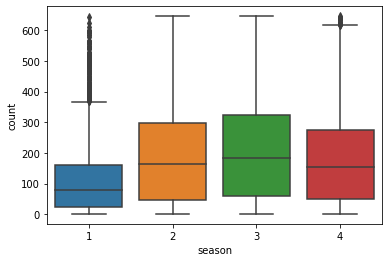

In [ ]:
sns.boxplot(x='season', y='count', data=df)
plt.show()

In [ ]:
print("Median number of bicycles used in season 1 :",df.loc[df['season']==1,'count'].median())
print("Median number of bicycles used in season 2 :",df.loc[df['season']==2,'count'].median())
print("Median number of bicycles used in season 3 :",df.loc[df['season']==3,'count'].median())
print("Median number of bicycles used in season 4 :",df.loc[df['season']==4,'count'].median())

Median number of bicycles used in season 1 : 78.0
Median number of bicycles used in season 2 : 165.0
Median number of bicycles used in season 3 : 185.0
Median number of bicycles used in season 4 : 154.0


Here we observe that median number of bicycles used in season 1 is less than in seasons 2,3 and 4.

### **Step 1: Define the null and alternate hypotheses**

$H_0:$ The mean count in different seasons are equal.

$H_a:$ The mean count in different seasons are different.

### **Step 2: Select Appropriate test**

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

*  For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

*  For equality of variance, Levene test is applied to the response variable.



### **Step 3: Preparing the data**

In [ ]:
s1 = df[df['season'] == 1]['count'].sample(2616)
s2= df[df['season'] == 2]['count'].sample(2616)
s3 = df[df['season'] == 3]['count'].sample(2616)
s4 = df[df['season'] == 4]['count'].sample(2616)

In [ ]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2669.0,112.775946,116.902627,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


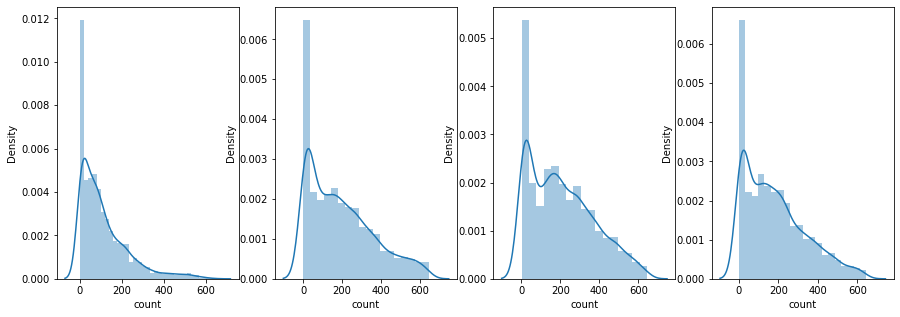

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.distplot(s1,kde=True)
plt.subplot(1,4,2)
sns.distplot(s2,kde=True)
plt.subplot(1,4,3)
sns.distplot(s3,kde=True)
plt.subplot(1,4,4)
sns.distplot(s4,kde=True)
plt.show()

The distribution does not seem normal, hence lets check by transforming it.

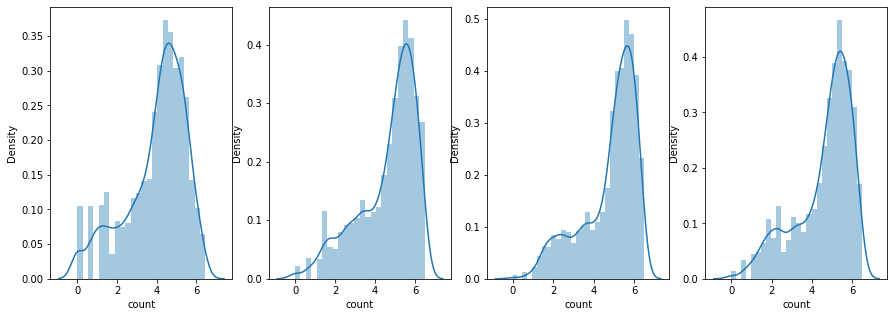

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.distplot(np.log(s1),kde=True)
plt.subplot(1,4,2)
sns.distplot(np.log(s2),kde=True)
plt.subplot(1,4,3)
sns.distplot(np.log(s3),kde=True)
plt.subplot(1,4,4)
sns.distplot(np.log(s4),kde=True)
plt.show()

Here, the distributions seem slightly close version of a normal distribution.

### **Step 4: Checking the test assumptions**

**Shapiro-Wilk’s test**

We will test the null hypothesis

$H_0:$ Count follows normal distribution
against the alternative hypothesis

$H_a:$ Count doesn't follow normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro
# find the p-value
s1_1, p_value1 = shapiro(np.log(s1)) 
print('The p-value1 is', p_value1)
s2_2, p_value2 = shapiro(np.log(s2)) 
print('The p-value is', p_value2)
s3_3, p_value3 = shapiro(np.log(s3)) 
print('The p-value is', p_value3)
s4_3, p_value4 = shapiro(np.log(s4)) 
print('The p-value is', p_value4)

The p-value1 is 6.639989914317152e-35
The p-value is 5.280382682358026e-39
The p-value is 1.7753050244531107e-41
The p-value is 2.2313744252491944e-39


**Levene’s test**

We will test the null hypothesis

$H_0$: All the count variances are equal
against the alternative hypothesis

$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( np.log(s1), np.log(s2), np.log(s3),np.log(s4))
# find the p-value
print('The p-value is', p_value)


The p-value is 1.027831351810812e-06


### **Step 5: Calculating the p-value**

In [ ]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(np.log(w1),np.log(w2),np.log(w3))
# print the p-value
print('The p-value is', p_value)

The p-value is 3.0593173437044304e-23


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

As the p-value 3.0593173437044304e-23 is less than the level of significance, we reject the null hypothesis


## **Conclusion:**




---


```
Therefore we have proved that the mean count of rented bicycles are not equal in different seasons.
```

---

### 4. `Check if Weather is dependent on the season`

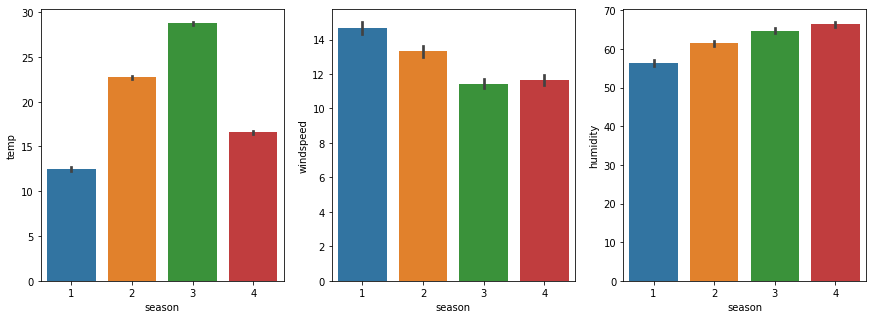

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.barplot(x='season', y='temp', data=df)
plt.subplot(1,4,2)
sns.barplot(x='season', y='windspeed', data=df)
plt.subplot(1,4,3)
sns.barplot(x='season', y='humidity', data=df)
plt.show()

**Observations :**

**Season vs Temperature :**


```
We notice that in seasons 2 and 3 , temperature is high.

And in seasons 1 and 4, temperature is comparitively on the lower side.
```

**Season vs Windspeed :**

```
Windspeed is slightly higher in season 1.
```

**Season vs Humidity :**


```
The humidity levels vary marginally across seasons. There doesn't  appear to be a significant change.
```




### **Step 1: Hypothesis formulation: The null and alternate hypothesis**


$H_0:$ The proportion of smoking is independent of different regions.

$H_a:$ The proportion of smoking is significantly different across different regions.


### **Step 2: Selecting the appropriate test**

*As this is a test of independence, so **chi-squared test** is an appropriate test to understand the statistics.*

### **Step 3: Preparing the data**

In [ ]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['season'],df['weather'])
contingency

weather,1,2,3
season,,,
1,1744,714,211
2,1720,690,223
3,1842,579,195
4,1656,787,221


### **Step 4: Checking the test assumptions**

*As **chi-squared test is non parametric test**, it makes no assumptions on the population statistics of the data.*

### **Step 5: Calculating the p-value**

In [ ]:
chi,pval,dof,exp = chi2_contingency(contingency)
sig=0.05
print(f'p_value: {pval:.6f}, significance value: {sig:.2f}\n')
if pval < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

p_value: 0.000000, significance value: 0.05

As the p-value 3.0593173437044304e-23 is less than the level of significance, we reject the null hypothesis


## **Conclusion:**




---


```
Hence, we have enough statistical evidence to say that weather does not depend on seasons.
```

---

In [ ]:
bins = [-1.00,10.00,15.00,25.00,30.00,40.00,50.00]
groups = ["cold", "cool", "warm", "Hot", "Very Hot","Extreme heat"]
df['temp_category'] = pd.cut(df['temp'],bins,labels=groups)

In [ ]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,Weekday,wind_category,temp_category
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,Sat,Light winds,cold


In [ ]:
df.groupby('temp_category')['count'].count().sort_values(ascending=False)

temp_category
warm            3901
Hot             2132
cool            2123
cold            1255
Very Hot        1170
Extreme heat       1
Name: count, dtype: int64

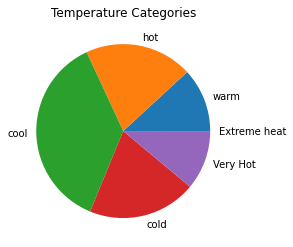

In [ ]:
plt.title("Temperature Categories")
plt.pie(df.groupby('temp_category')['count'].count(),labels=["warm", "hot", "cool", "cold", "Very Hot","Extreme heat"])
plt.show()

In [ ]:
bins = [0,30,60,100]
groups = ["too dry","optimal","too humid"]
df['humidity_category'] = pd.cut(df['humidity'],bins,labels=groups)

In [ ]:
df.groupby('humidity_category')['count'].count()

humidity_category
too dry       470
optimal      4710
too humid    5684
Name: count, dtype: int64

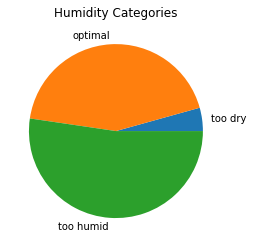

In [ ]:
plt.title("Humidity Categories")
plt.pie(df.groupby('humidity_category')['count'].count(),labels=["too dry","optimal","too humid"])
plt.show()

In [ ]:
lst =[]
for i in range(len(df['datetime'])):
    if df['datetime'][i].time().hour >=6 and df['datetime'][i].time().hour <= 18:
        lst.append('day')
    else:
        lst.append('night')
df['day_or_night'] = pd.Series(lst)

In [ ]:
df['day_or_night'].value_counts()

day      5922
night    4964
Name: day_or_night, dtype: int64

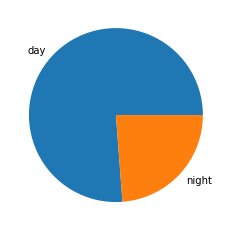

In [ ]:
plt.pie(df.groupby('day_or_night')['count'].sum(),labels=['day','night'])
plt.show()

# **Business Observations**

*  Working Day **does not have an effect** on number of electric cycles rented.

*  Number of cycles rented are **different in different seasons.**

*  Number of cycles rented are **different in different weather.**

*  Weather is **independent** of season. 

*  It is observed that there was more use of the bicycles in seasons 2,3 and 4 than in season 1.

*  Weather conditions 1 and 2 contribute to 80% of usage.

*  80% of the time the electric bicycles were used during light and moderate winds i.e; upto windspeeds of 20-30km/h.

*  Bicycles are least used in hot conditions, i.e;
40 \*C to 50 \*C .

*  The bikes are most used between 6am to 6pm.

* The bicycles are least used in too dry conditions.


# **Recommendations**

* More bicycles should be available in seasons 2,3 and 4.

* Bicycles are to be placed in areas with temperatures less than 40 *C.

* Availability of bicycles in weather conditions 1 and 2 is ideal.

* Bicycle usage is more between 6am to 6pm, hence keeping them available during this time is crucial.

* Avoid placing the bicycles in too dry regions as they are used the least under too dry humid conditions.

* The bicycles are to be equally available during weekdays and weekends.